In [1]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
training_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wine-dataset/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wine-dataset/test.csv')

#lets look at null values
training_data.isnull().sum()


user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [2]:
#Remove rows with null values in reviw_descrption column as we only require that column
df_train = training_data[training_data.review_description.notnull()]
df_test = test_data[test_data.review_description.notnull()]
#Replacing NaN values with mean in price column
df_train['price'].fillna((df_train['price'].mean()), inplace=True)
df_test['price'].fillna((df_test['price'].mean()), inplace=True)

#we can see there are zero null values in price column now
df_train.isnull().sum()


user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                     0
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [3]:
df_train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


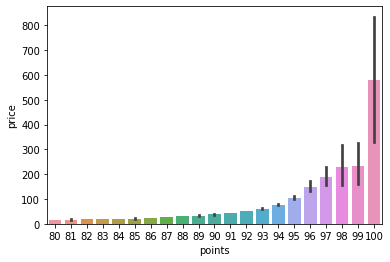

In [4]:
# OR we can drop all rows with NaN values but it will largely reduces our dataset, so not using it. 
"""
df_train = training_data.dropna()
df_test = test_data.dropna()
"""

#We will visualize our data using Seaborn. This will allow us to see 
#if there is a strong correlation between different data points 
import seaborn as sns
sns.barplot(x = 'points', y = 'price', data = df_train)

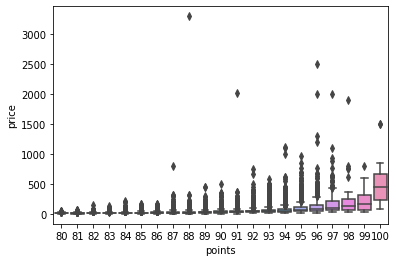

In [5]:
sns.boxplot(x = 'points', y = 'price', data = df_train)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re

In [0]:
ps = PorterStemmer()
# Use NLTK's PorterStemmer
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [ps.stem(word) for word in words]
    return words

#cleaning the text and creating a bag of words model.
def feature_matrix(review):
    #cv = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features=4000)
    cv = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer,max_features=5000)
    x = cv.fit_transform(np.array(review))
    return x, cv

In [8]:
#calling vector and vectorizer
x, cv = feature_matrix(df_train['review_description'])

x = x.todense()
y = df_train['variety']

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [0]:
# Applying k-Fold Cross Validation for accuracy
from sklearn.model_selection import cross_val_score
def accuracy(classifier):
  accuracies = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
  return accuracies.mean(), accuracies.std()

In [0]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [11]:
#Fitting logistic_regression classifier
from sklearn.linear_model import LogisticRegression
logireg = LogisticRegression(multi_class='ovr',solver='lbfgs',max_iter=10000)
logireg = logireg.fit(x_train, y_train)
print("The accuracy and standard deviation for our logistic regression model is {}".format(accuracy(logireg)))

The accuracy and standard deviation for our logistic regression model is (0.6465041026867715, 0.011937988999467098)


In [12]:
#For test_data
x1, cv1 = feature_matrix(df_test['review_description'])
x1 = x1.todense()

y_pred = logireg.predict(x1)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [0]:
results = pd.Series(y_pred, name='varity')
submission = pd.concat([df_test,results],axis = 1)
submission.to_csv("wine_varity_test.csv",index=False)